###
**Background**

Pundi-Pundi is a finance company in one country that wants to build the correct strategy for running telemarketing. The problem is that company doesn't have a strategy for running effectively. Some Divisions have different indicators to analyze potential customers  that make too many offers of products sent to the same customer. As a result, the offer is indicated as a spam by some customers so whatever has to be done are useless.

**Goal**

Build the model that can analyze correct product for getting effectivity telemarketing.

**NOTE**

Use older Python version such as 3.10.18 instead of newer python or downgrade your numpy to numpy 2.0 below for running one of this project algorithm(K-Medoids). Module of that algorithm doesn't support a newer numpy for running that algorithm.

# **Preparation**

## Import Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## Import Dataset

In [2]:
# Import data
source= path_1 = "https://raw.githubusercontent.com/brainspopper/dataset/main/clustering_data.csv"
data = pd.read_csv(source)
data.head()

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,G28036,Bogor,Internet Banking,< 1 Tahun,69.0,Laki-laki,Menikah,3,Doktor,1,0,0,0,0,0,1,747,44607
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
3,G04482,Bandung,Cabang,< 1 Tahun,45.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,431,417250579
4,G07807,Bandung,Aplikasi Digital,< 1 Tahun,34.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,184,453573593


In [3]:
# Data type info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28129 entries, 0 to 28128
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GCIF                        28129 non-null  object 
 1   Area                        28129 non-null  object 
 2   Jalur_Pembukaan             28129 non-null  object 
 3   Vintage                     28129 non-null  object 
 4   Usia                        24084 non-null  float64
 5   Jenis_Kelamin               28129 non-null  object 
 6   Status_Perkawinan           28129 non-null  object 
 7   Jumlah_Anak                 28129 non-null  int64  
 8   Pendidikan                  28129 non-null  object 
 9   Produk_Tabungan             28129 non-null  int64  
 10  Produk_Deposito             28129 non-null  int64  
 11  Produk_Kartu_Kredit         28129 non-null  int64  
 12  Produk_Kredit_Rumah         28129 non-null  int64  
 13  Produk_Kredit_Kendaraan     281

# **Data Understanding**

In [15]:
data.select_dtypes(include=['object']).columns.to_list()

['GCIF',
 'Area',
 'Jalur_Pembukaan',
 'Vintage',
 'Jenis_Kelamin',
 'Status_Perkawinan',
 'Pendidikan']

In [16]:
# Distribution Cust Based on Area
area= data.groupby('Area')['GCIF'].count().reset_index()
area.columns=['Area','Number of Cust']
print(area)

       Area  Number of Cust
0   Bandung            6917
1     Bogor            1191
2   Jakarta            7017
3     Jogja            3001
4      Solo            5001
5  Surabaya            5002


**INSIGHT**

Mostly Customer residental in Jakarta.

In [17]:
data.groupby('Area')[data.select_dtypes(exclude=['object']).columns].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,
Bandung,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Bogor,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08
Jakarta,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Jogja,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Solo,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Surabaya,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08


In [18]:
# Distirbution Cust Bases on Jalur_Pembukaan
way = data.groupby('Jalur_Pembukaan')['GCIF'].count().reset_index()
way.columns=['Jalur_Pembukaan','Number of Cust']
print(way)

    Jalur_Pembukaan  Number of Cust
0  Aplikasi Digital            6216
1            Cabang            5856
2  Internet Banking            5795
3     Telemarketing           10262


**INSIGHT**

Mostly customers join through Telemarketing Program. There is the reason for this project focus on the Telemarketing strategy only.

In [19]:
data.groupby('Jalur_Pembukaan')[data.select_dtypes(exclude=['object']).columns].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,
Aplikasi Digital,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08
Telemarketing,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08


In [20]:
# Distribution Cust Based on Vinatge
vintage= data.groupby('Vintage')['GCIF'].count().reset_index()
vintage.columns=['Vintage','Number of Cust']
print(vintage)

       Vintage  Number of Cust
0  2 - 3 Tahun           13953
1    < 1 Tahun            9278
2    > 4 Tahun            4898


In [21]:
data.groupby('Vintage')[data.select_dtypes(exclude=['object']).columns].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,
2 - 3 Tahun,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


**INSIGHT**

Mostly have been customers for 2-3 tahun.

In [22]:
# Distribution Based on Status Pernikahan
status= data.groupby('Status_Perkawinan')['GCIF'].count().reset_index()
status.columns=['Status','Number of Cust']
print(status)

          Status  Number of Cust
0  Belum Menikah            8168
1          Cerai            4077
2     Janda/Duda            4045
3        Menikah           11839


**INSIGHT**

Mostly customers have been maried.

In [23]:
data.groupby('Status_Perkawinan')[data.select_dtypes(exclude=['object']).columns].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Status_Perkawinan,,,,,,,,,,,
Belum Menikah,39.571621,0.000000,1.000000,0.596107,0.333374,0.331660,0.160749,0.499633,2.921523,420.636141,2.423448e+08
Cerai,50.226883,2.003679,1.000000,0.607555,0.337258,0.509688,0.172676,0.389747,3.016924,426.269070,2.393499e+08
Janda/Duda,NaN,1.201978,1.000000,0.609889,0.337948,0.597281,0.161187,0.401731,3.108035,289.648208,2.474754e+08
Menikah,42.084467,1.989948,0.824309,0.605457,0.329504,0.797027,0.164372,0.661542,3.382211,429.378833,2.575412e+08


In [24]:
# Distribution Based on Pendidikan
edu= data.groupby('Pendidikan')['GCIF'].count().reset_index()
edu.columns=['Education','Number of Cust']
print(edu)

              Education  Number of Cust
0                Doktor            2605
1              Magister            2468
2                    SD            5229
3                   SMA            5085
4                   SMP            2538
5               Sarjana            7691
6  Tidak Sekolah Formal            2513


**INSIGHT**

Mostly customers have been bachelor degree.

In [25]:
data.groupby('Pendidikan')[data.select_dtypes(exclude='object').columns].mean()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Pendidikan,,,,,,,,,,,
Doktor,41.941468,1.280998,0.929750,0.593474,0.345489,0.602303,0.174280,0.534741,3.180038,401.396545,2.461291e+08
Magister,42.659112,1.286467,0.927472,0.605754,0.352917,0.592788,0.156807,0.558752,3.194489,402.770665,2.518470e+08
SD,42.842732,1.272901,0.924651,0.603748,0.335437,0.585389,0.165232,0.538918,3.153375,408.624402,2.487423e+08
SMA,42.808137,1.304621,0.922517,0.609833,0.332350,0.589971,0.161652,0.523304,3.139626,403.406096,2.513348e+08
SMP,42.837314,1.352640,0.923956,0.597715,0.325453,0.602837,0.160757,0.544917,3.155634,410.273050,2.478497e+08
Sarjana,42.458725,1.313223,0.929138,0.604993,0.325055,0.589780,0.167078,0.538812,3.154856,408.991549,2.500305e+08
Tidak Sekolah Formal,42.607689,1.295265,0.923597,0.601671,0.328293,0.588938,0.157183,0.536809,3.136490,403.572622,2.434971e+08


# **Data Preparation**

## Duplicate and Missing Data Check

In [26]:
# Check duplicate
data.duplicated().sum()

0

In [27]:
# Cek Missing Data
data.isnull().sum()

GCIF                             0
Area                             0
Jalur_Pembukaan                  0
Vintage                          0
Usia                          4045
Jenis_Kelamin                    0
Status_Perkawinan                0
Jumlah_Anak                      0
Pendidikan                       0
Produk_Tabungan                  0
Produk_Deposito                  0
Produk_Kartu_Kredit              0
Produk_Kredit_Rumah              0
Produk_Kredit_Kendaraan          0
Produk_Kredit_Dana_Tunai         0
Total_Kepemilikan_Produk         0
Pendapatan_Tahunan               0
Total_Relationship_Balance       0
dtype: int64

In [28]:
# Deletion Missing Data
data= data.dropna()
data.isnull().sum()

GCIF                          0
Area                          0
Jalur_Pembukaan               0
Vintage                       0
Usia                          0
Jenis_Kelamin                 0
Status_Perkawinan             0
Jumlah_Anak                   0
Pendidikan                    0
Produk_Tabungan               0
Produk_Deposito               0
Produk_Kartu_Kredit           0
Produk_Kredit_Rumah           0
Produk_Kredit_Kendaraan       0
Produk_Kredit_Dana_Tunai      0
Total_Kepemilikan_Produk      0
Pendapatan_Tahunan            0
Total_Relationship_Balance    0
dtype: int64

## Outlier Check

In [29]:
data.count()

GCIF                          24084
Area                          24084
Jalur_Pembukaan               24084
Vintage                       24084
Usia                          24084
Jenis_Kelamin                 24084
Status_Perkawinan             24084
Jumlah_Anak                   24084
Pendidikan                    24084
Produk_Tabungan               24084
Produk_Deposito               24084
Produk_Kartu_Kredit           24084
Produk_Kredit_Rumah           24084
Produk_Kredit_Kendaraan       24084
Produk_Kredit_Dana_Tunai      24084
Total_Kepemilikan_Produk      24084
Pendapatan_Tahunan            24084
Total_Relationship_Balance    24084
dtype: int64

In [30]:
# Ourlier Handling with zscore
from scipy import stats
zscore= stats.zscore(data[['Usia','Pendapatan_Tahunan','Total_Relationship_Balance']])  # Use Numerical data only
# filter data to remove outlier from dataset
data= data[(zscore<3).all(axis=1)]

**NOTE**

Oulier data have zscore out of range between -3 and 3.

In [31]:
print(zscore.max())
print(zscore.min())

4.080913124259092
-1.9091609809090295


In [32]:
data.count()

GCIF                          23704
Area                          23704
Jalur_Pembukaan               23704
Vintage                       23704
Usia                          23704
Jenis_Kelamin                 23704
Status_Perkawinan             23704
Jumlah_Anak                   23704
Pendidikan                    23704
Produk_Tabungan               23704
Produk_Deposito               23704
Produk_Kartu_Kredit           23704
Produk_Kredit_Rumah           23704
Produk_Kredit_Kendaraan       23704
Produk_Kredit_Dana_Tunai      23704
Total_Kepemilikan_Produk      23704
Pendapatan_Tahunan            23704
Total_Relationship_Balance    23704
dtype: int64

## Filtering Data for Analyze

In [33]:
# Filter dataset to create new data for Telemarketing Only
anal= data[data['Jalur_Pembukaan']=='Telemarketing']
anal.head()

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562


In [34]:
# Drop Unnecessary Column
anal= anal.drop(columns=['GCIF','Jalur_Pembukaan']).reset_index()
anal

,index,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,2,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,7,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,8,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,9,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,28089,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal,1,1,1,1,0,1,5,489,321693904
8649,28090,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal,1,1,1,1,1,0,5,658,224477967
8650,28092,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal,1,1,1,1,0,1,5,585,411871605
8651,28095,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal,1,1,0,1,1,1,5,279,161744694


## Splitting Dataset

There is three Dataset for experiment:
- Experiment 0 : Use All of varibael
- Experiemnt 1 : Use demographic variabel
- Experimetn 2 : Use Financial Variabel

In [35]:
# Define Experiment 1 Dataset (Demographic)
exp1= anal.iloc[:,1:8]
exp1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
8648,Bandung,2 - 3 Tahun,54.0,Laki-laki,Menikah,0,Tidak Sekolah Formal
8649,Jakarta,2 - 3 Tahun,58.0,Laki-laki,Belum Menikah,0,Tidak Sekolah Formal
8650,Bandung,2 - 3 Tahun,42.0,Laki-laki,Cerai,3,Tidak Sekolah Formal
8651,Jogja,2 - 3 Tahun,44.0,Laki-laki,Cerai,1,Tidak Sekolah Formal


In [36]:
# Define Experiment 2 Dataaset (Financial)
exp2= anal.iloc[:,8:]
exp2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
8648,1,1,1,1,0,1,5,489,321693904
8649,1,1,1,1,1,0,5,658,224477967
8650,1,1,1,1,0,1,5,585,411871605
8651,1,1,0,1,1,1,5,279,161744694


## Encoding Categorical Variabel

In [37]:
# Categorical Data Column check (Demographic Variabel)
exp1.select_dtypes(include='object').columns.to_list()

['Area', 'Vintage', 'Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan']

In [38]:
# Encoding Categorical VAriabel
exp1= pd.get_dummies(exp1, columns=['Area','Vintage','Jenis_Kelamin','Status_Perkawinan','Pendidikan']).astype(int)
exp1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Status_Perkawinan_Menikah,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal
0,23,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
1,30,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
2,29,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
3,49,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0
4,21,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8649,58,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
8650,42,3,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
8651,44,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1


## Standardization for Numerical Variabel (Financial)

In [39]:
# Numerical Data Column check (Financial Variabel)
col_name= exp2.columns
col_name

Index(['Produk_Tabungan', 'Produk_Deposito', 'Produk_Kartu_Kredit',
       'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance'],
      dtype='object')

In [40]:
# Standardization
from sklearn.preprocessing import StandardScaler
std= StandardScaler()
exp2= pd.DataFrame(std.fit_transform(exp2))
exp2

,0,1,2,3,4,5,6,7,8
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...
8648,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


In [41]:
# Change Columns to defalut
exp2.columns= col_name
exp2.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416


# **Corelation Checker**

## Check and Drop

The idea is when some variabel have high correaltion, only one of them in use instead of both of them for efficiency analysis. High correalation indicated that two variabel have high relationship. For Example, if value in one of them increases then value in another should increase to0.

High correlation marked by correlation value between variabel more than 0.7(positive correlation) or less than -0.7(negative correlation)

In this project we will ignore direction of correlation, so we put all correlation value to absolute number.

In [42]:
# Define Correlation
cor1= exp1.corr().abs()
cor2= exp2.corr().abs()

In [43]:
# Remove Redundant Value From Matrix
upper1= cor1.where(np.triu(np.ones(cor1.shape),k=1).astype(bool))
upper2= cor2.where(np.triu(np.ones(cor2.shape),k=1).astype(bool))

# Search value that corr more than 0.7
high1= [col for col in upper1.columns if any(upper1[col]>0.7)]
high2= [col for col in upper2.columns if any(upper2[col]>0.7)]

# Drop data that have high correaltion
exp1= exp1.drop(high1,axis=1)
exp2= exp2.drop(high2,axis=1)

In [44]:
# Check what columns were dropped
print(high1)
print(high2)

['Jenis_Kelamin_Perempuan', 'Status_Perkawinan_Menikah']
[]


## Merge All Data Final

In [45]:
# Merge final data from exp1 and exp2 for define exp0 dataset
exp0= pd.concat([exp1,exp2],axis=1)
exp0

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,Status_Perkawinan_Cerai,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-1.256170,-1.607805
1,30,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.800973,0.410538
2,29,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.717705,-1.146030
3,49,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,0.103871,0.047197
4,21,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0.315645,-1.220392,-0.695676,-1.184178,-0.436158,-1.121909,-2.057258,-0.928650,-1.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8648,54,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.359225,0.568823
8649,58,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0.315645,0.819409,1.437451,0.844468,2.292747,-1.121909,1.797748,1.297376,-0.111517
8650,42,3,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0.315645,0.819409,1.437451,0.844468,-0.436158,0.891338,1.797748,0.892139,1.199907
8651,44,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0.315645,0.819409,-0.695676,0.844468,2.292747,0.891338,1.797748,-0.806524,-0.550539


# **Modelling**

Build a model with two types algorithm:
- K-Means
- K-Medoid*

Check quality of clustering with silhouette score.

*Need older numpy version for run this algorithm. I use virtual enviroment with pyhton version 3.10.18 to run it.

## K-Means

In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [47]:
# Experiment 0

# Run with several variation hyperparameter (number of cluster)
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(exp0)
    silhouette_avg = silhouette_score(exp0, cluster_labels)
    print(f"K-MEans n-cluster={n_clusters} have silhouette score={silhouette_avg:.4f}")
    anal['Clustering_KMeans_Exp0_'+str(n_clusters)] = cluster_labels

K-MEans n-cluster=3 have silhouette score=0.4373
K-MEans n-cluster=4 have silhouette score=0.3799
K-MEans n-cluster=5 have silhouette score=0.3231


**NOTE**

- Silhouette score close to 1 means well clustered data.Data within a cluster have closely distance while to another data outside cluster is widely.
- Silhuoette score close to 0 means there is overlap of one cluster to another.
- Silhuoette score negative means there is missplaced data in a cluster.

In [48]:
# Experiment 1

# Run with several variation hyperparameter (number of cluster)
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(exp1)
    silhouette_avg = silhouette_score(exp1, cluster_labels)
    print(f"K-MEans n-cluster={n_clusters} have silhouette score={silhouette_avg:.4f}")
    anal['Clustering_KMeans_Exp1_'+str(n_clusters)] = cluster_labels

K-MEans n-cluster=3 have silhouette score=0.5022
K-MEans n-cluster=4 have silhouette score=0.4888
K-MEans n-cluster=5 have silhouette score=0.4210


In [49]:
# Experiment 2

# Run with several variation hyperparameter (number of cluster)
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(exp2)
    silhouette_avg = silhouette_score(exp2, cluster_labels)
    print(f"K-MEans n-cluster={n_clusters} have silhouette score={silhouette_avg:.4f}")
    anal['Clustering_KMeans_Exp2_'+str(n_clusters)] = cluster_labels

K-MEans n-cluster=3 have silhouette score=0.1757
K-MEans n-cluster=4 have silhouette score=0.1750
K-MEans n-cluster=5 have silhouette score=0.1881


## K-Medoids

In [50]:
from sklearn_extra.cluster import KMedoids
# Experiment 0

# Run with several variation hyperparameter (number of cluster)
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(exp0)
    silhouette_avg = silhouette_score(exp0, cluster_labels)
    print(f"K-Medoids n-cluster={n_clusters} have silhouette score={silhouette_avg:.4f}")
    anal['Clustering_KMedoids_Exp0_'+str(n_clusters)] = cluster_labels

K-Medoids n-cluster=3 have silhouette score=0.4337
K-Medoids n-cluster=4 have silhouette score=0.3352
K-Medoids n-cluster=5 have silhouette score=0.3212


In [53]:
# Experiment 1

# Run with several variation hyperparameter (number of cluster)
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(exp1)
    silhouette_avg = silhouette_score(exp1, cluster_labels)
    print(f"K-Medoids n-cluster={n_clusters} have silhouette score={silhouette_avg:.4f}")
    anal['Clustering_KMedoids_Exp0_'+str(n_clusters)] = cluster_labels

c:\Users\fahru\anaconda3\envs\piton10\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


K-Medoids n-cluster=3 have silhouette score=0.0051


c:\Users\fahru\anaconda3\envs\piton10\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


K-Medoids n-cluster=4 have silhouette score=0.4658


c:\Users\fahru\anaconda3\envs\piton10\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


K-Medoids n-cluster=5 have silhouette score=0.4178


In [52]:
# Experiment 2

# Run with several variation hyperparameter (number of cluster)
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(exp2)
    silhouette_avg = silhouette_score(exp2, cluster_labels)
    print(f"K-Medoids n-cluster={n_clusters} have silhouette score={silhouette_avg:.4f}")
    anal['Clustering_KMedoids_Exp0_'+str(n_clusters)] = cluster_labels

K-Medoids n-cluster=3 have silhouette score=0.1166
K-Medoids n-cluster=4 have silhouette score=0.0968
K-Medoids n-cluster=5 have silhouette score=0.0888


# **Result Analysis**

Model Experiment 1 with K-Means modelling shows the best result based on silhouette score (0.50). Lets analyze this result.

## Visualization

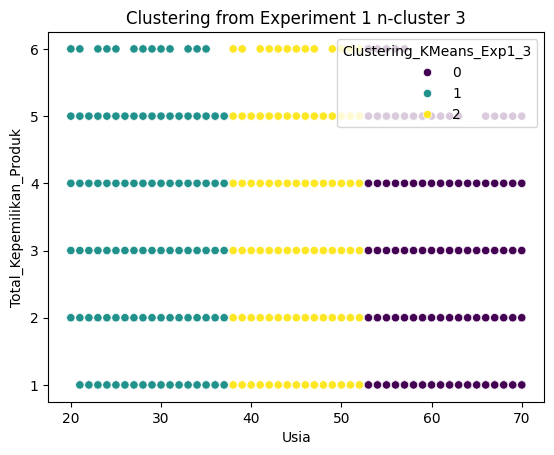

In [54]:
# Create plot to show clustered data
sns.scatterplot(data=anal, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3',palette='viridis')
plt.title('Clustering from Experiment 1 n-cluster 3')
plt.show()

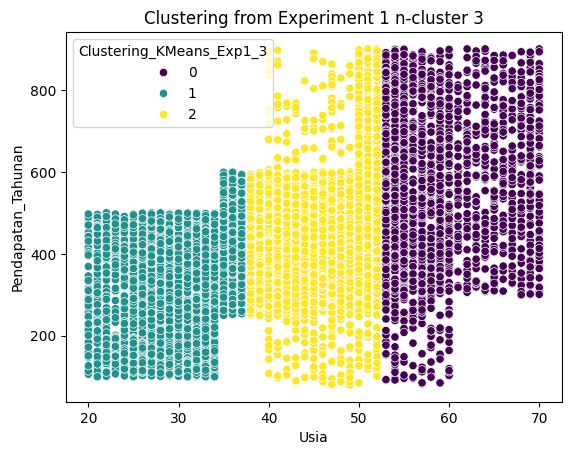

In [55]:
# Create plot to show clustered data
sns.scatterplot(data=anal, x='Usia', y='Pendapatan_Tahunan', hue='Clustering_KMeans_Exp1_3',palette='viridis')
plt.title('Clustering from Experiment 1 n-cluster 3')
plt.show()

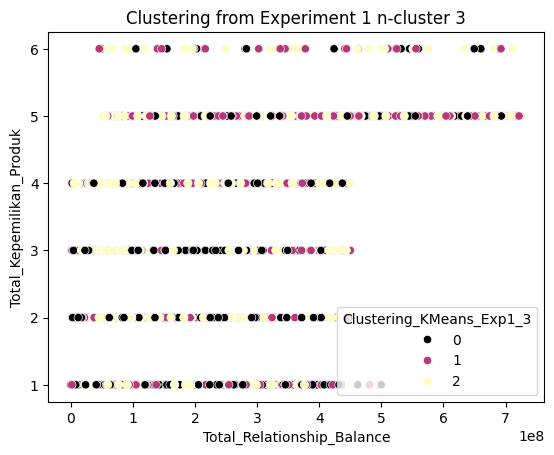

In [56]:
# Create plot to show clustered data
sns.scatterplot(data=anal, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3',palette='magma')
plt.title('Clustering from Experiment 1 n-cluster 3')
plt.show()

From two diagram above shows that data will well clustered if we analyze frome  'usia' variabel point of view.

In [57]:
# Summary of Result
cluster_means = anal[['Usia','Jumlah_Anak','Produk_Tabungan','Produk_Deposito','Produk_Kartu_Kredit','Produk_Kredit_Rumah','Produk_Kredit_Kendaraan','Produk_Kredit_Dana_Tunai','Total_Kepemilikan_Produk','Total_Relationship_Balance','Clustering_KMeans_Exp1_3']].groupby('Clustering_KMeans_Exp1_3').mean()
print(cluster_means)
pd

                               Usia  Jumlah_Anak  Produk_Tabungan  \
Clustering_KMeans_Exp1_3                                            
0                         58.840056     1.474672         0.657129   
1                         29.503177     1.191528         1.000000   
2                         45.571206     1.310945         0.983520   

                          Produk_Deposito  Produk_Kartu_Kredit  \
Clustering_KMeans_Exp1_3                                         
0                                0.600844             0.338649   
1                                0.592436             0.308018   
2                                0.602612             0.336443   

                          Produk_Kredit_Rumah  Produk_Kredit_Kendaraan  \
Clustering_KMeans_Exp1_3                                                 
0                                    0.618668                 0.168386   
1                                    0.586989                 0.157337   
2                          

<module 'pandas' from 'c:\\Users\\fahru\\anaconda3\\envs\\piton10\\lib\\site-packages\\pandas\\__init__.py'>

## Deep Dives Result

### Group 0

In [58]:
# Summary Numerical data
anal[anal['Clustering_KMeans_Exp1_3']==0][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,2132.000000,2132.000000,2132.000000,2.132000e+03
mean,58.840056,1.474672,2.930113,2.389776e+08
std,5.133619,1.467245,1.041285,1.379077e+08
min,53.000000,0.000000,1.000000,1.028000e+03
25%,55.000000,0.000000,2.000000,1.266333e+08
50%,57.000000,1.000000,3.000000,2.328763e+08
75%,62.000000,3.000000,4.000000,3.493216e+08
max,70.000000,4.000000,6.000000,7.181097e+08


In [59]:
# Summary Categorical data
anal.select_dtypes(include='object').columns.tolist()

['Area', 'Vintage', 'Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan']

In [60]:
# Based on Area
anal[anal['Clustering_KMeans_Exp1_3']==0]['Area'].value_counts(normalize=True)

Area
Jakarta     0.478893
Bandung     0.166041
Solo        0.128987
Surabaya    0.126173
Jogja       0.072702
Bogor       0.027205
Name: proportion, dtype: float64

In [61]:
# Based on Vintage
anal[anal['Clustering_KMeans_Exp1_3']==0]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.486867
< 1 Tahun      0.313321
> 4 Tahun      0.199812
Name: proportion, dtype: float64

In [62]:
# Based on Jenis
anal[anal['Clustering_KMeans_Exp1_3']==0]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.668386
Perempuan    0.331614
Name: proportion, dtype: float64

In [63]:
# Based on Pendidikan
anal[anal['Clustering_KMeans_Exp1_3']==0]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.258443
SD                      0.204972
SMA                     0.180113
Tidak Sekolah Formal    0.101313
Magister                0.088180
SMP                     0.083959
Doktor                  0.083021
Name: proportion, dtype: float64

### Group 1

In [64]:
# Summary Numerical data
anal[anal['Clustering_KMeans_Exp1_3']==1][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3305.000000,3305.000000,3305.000000,3.305000e+03
mean,29.503177,1.191528,3.243873,2.439352e+08
std,4.254972,1.480683,1.008655,1.452356e+08
min,20.000000,0.000000,1.000000,1.016565e+06
25%,26.000000,0.000000,3.000000,1.222784e+08
50%,30.000000,0.000000,3.000000,2.408255e+08
75%,33.000000,2.000000,4.000000,3.578412e+08
max,37.000000,4.000000,6.000000,7.228870e+08


In [65]:
# Summary Categorical data
anal.select_dtypes(include='object').columns.tolist()

['Area', 'Vintage', 'Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan']

In [66]:
# Based on Area
anal[anal['Clustering_KMeans_Exp1_3']==1]['Area'].value_counts(normalize=True)

Area
Jakarta     0.476248
Bandung     0.179728
Surabaya    0.126475
Solo        0.118306
Jogja       0.073222
Bogor       0.026021
Name: proportion, dtype: float64

In [67]:
# Based on Vintage
anal[anal['Clustering_KMeans_Exp1_3']==1]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.501967
< 1 Tahun      0.293192
> 4 Tahun      0.204841
Name: proportion, dtype: float64

In [68]:
# Based on Jenis
anal[anal['Clustering_KMeans_Exp1_3']==1]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.640847
Perempuan    0.359153
Name: proportion, dtype: float64

In [69]:
# Based on Pendidikan
anal[anal['Clustering_KMeans_Exp1_3']==1]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.274130
SMA                     0.192436
SD                      0.180333
Doktor                  0.097731
Magister                0.087443
SMP                     0.084720
Tidak Sekolah Formal    0.083207
Name: proportion, dtype: float64

### Group 2

In [70]:
# Summary Numerical data
anal[anal['Clustering_KMeans_Exp1_3']==2][['Usia','Jumlah_Anak','Total_Kepemilikan_Produk','Total_Relationship_Balance']].describe(include="all")

,Usia,Jumlah_Anak,Total_Kepemilikan_Produk,Total_Relationship_Balance
count,3216.000000,3216.000000,3216.000000,3.216000e+03
mean,45.571206,1.310945,3.157960,2.377450e+08
std,4.278838,1.482616,1.045431,1.437032e+08
min,38.000000,0.000000,1.000000,1.384147e+06
25%,42.000000,0.000000,2.000000,1.166975e+08
50%,46.000000,1.000000,3.000000,2.309003e+08
75%,50.000000,3.000000,4.000000,3.468400e+08
max,52.000000,4.000000,6.000000,7.259942e+08


In [71]:
# Summary Categorical data
anal.select_dtypes(include='object').columns.tolist()

['Area', 'Vintage', 'Jenis_Kelamin', 'Status_Perkawinan', 'Pendidikan']

In [72]:
# Based on Area
anal[anal['Clustering_KMeans_Exp1_3']==2]['Area'].value_counts(normalize=True)

Area
Jakarta     0.484142
Bandung     0.161692
Surabaya    0.131530
Solo        0.112562
Jogja       0.081468
Bogor       0.028607
Name: proportion, dtype: float64

In [73]:
# Based on Vintage
anal[anal['Clustering_KMeans_Exp1_3']==2]['Vintage'].value_counts(normalize=True)

Vintage
2 - 3 Tahun    0.503731
< 1 Tahun      0.295398
> 4 Tahun      0.200871
Name: proportion, dtype: float64

In [74]:
# Based on Jenis
anal[anal['Clustering_KMeans_Exp1_3']==2]['Jenis_Kelamin'].value_counts(normalize=True)

Jenis_Kelamin
Laki-laki    0.678483
Perempuan    0.321517
Name: proportion, dtype: float64

In [75]:
# Based on Pendidikan
anal[anal['Clustering_KMeans_Exp1_3']==2]['Pendidikan'].value_counts(normalize=True)

Pendidikan
Sarjana                 0.273321
SD                      0.181592
SMA                     0.180037
SMP                     0.095771
Doktor                  0.093905
Tidak Sekolah Formal    0.089552
Magister                0.085821
Name: proportion, dtype: float64